In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [5]:
data = pd.read_csv("figure7.csv")
df = pd.DataFrame(data)

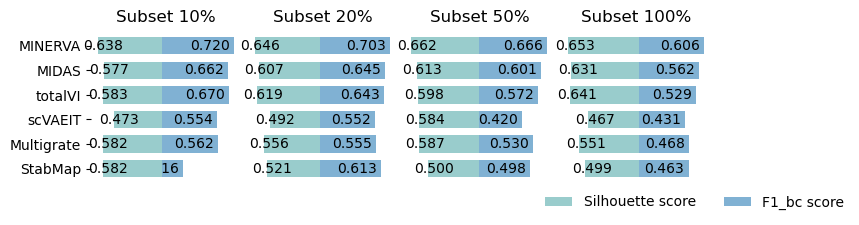

In [6]:
subset_ratios = df['Subset Ratio'].unique()

fig, axes = plt.subplots(1, 4, figsize=(8, 2))
plt.subplots_adjust(wspace = 0.05)
axes = axes.flatten()

for i, subset_ratio in enumerate(subset_ratios):
    ax = axes[i]
    subset_df = df[df['Subset Ratio'] == subset_ratio]
    models = subset_df['Model']
    sc = subset_df['Silhouette score']
    f1 = subset_df['F1_bc score']

    # 左侧y轴
    bars1 = ax.barh(models, f1, color='#80B1D3', left=0, height=0.7)
    if i != 0:
        ax.yaxis.set_visible(False)
    else:
        ax.set_yticks(range(len(models)))
        ax.set_yticklabels([label if '(' not in label else re.sub(r'(.*) (.*) (.*)', r'\1\n\2 \3', label) for label in models], ha='right')
    ax.xaxis.set_visible(False)
    for bar, value in zip(bars1, f1):
        # color ='red' if value == max(f1) else 'black'
        color ='black'
        ax.text(bar.get_width() - 0.04, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', ha='right', va='center', color=color)

    # 右侧
    ax2 = ax.twinx()
    bars2 = ax2.barh(models, -sc, color='#99CCCC', left=0, height=0.7)
    for bar, value in zip(bars2, sc):
        # color ='red' if value == max(sc) else 'black'
        color ='black'
        ax2.text(bar.get_width() + 0.25, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', ha='right', va='center', color=color)

    # 隐藏右侧 Y 轴的标签和刻度
    ax2.yaxis.set_visible(False)
    ax2.xaxis.set_visible(False)


    ax.set_title(f'Subset {subset_ratio}')
    for spine in ['right', 'top', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)
        ax2.spines[spine].set_visible(False)
    
    if i == 3:
        plt.legend([bars2[0], bars1[0]], ['Silhouette score', 'F1_bc score'], frameon=False, loc = (-0.15, -0.2), ncol = 2)

plt.savefig('figure7.svg')